In [ ]:
'''
【项目03】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

In [7]:
'''
1、数据清洗
'''
def clean_data(file):
    data = pd.read_csv(file,engine = 'python')
    data.fillna("缺失数据",inplace = True)
    return data
#清洗数据
data = clean_data("爱奇艺视频数据.csv")
data.head()

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,缺失数据,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,缺失数据,...,2004,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,缺失数据,2034,32722,8.06953e+06,缺失数据,20,2,30688
1,2016年5月24日,缺失数据,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,缺失数据,...,2008,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,缺失数据,7291,39492,7.02139e+07,缺失数据,32,1,32201
2,2016年5月24日,缺失数据,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,缺失数据,...,2005,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,缺失数据,1183,10105,3.31077e+06,缺失数据,30,1,8922
3,2016年5月24日,缺失数据,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,缺失数据,...,2006,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,缺失数据,451,2639,2.08896e+06,缺失数据,34,1,2188
4,2016年5月24日,缺失数据,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,缺失数据,...,2007,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,缺失数据,63551,748338,4.12879e+07,缺失数据,30,1,684787


In [8]:
'''
2、时间标签化
'''
def time_change(df,*cols):
    for col in cols:
        df[col] = df[col].str.replace('年','.')
        df[col] = df[col].str.replace('月','.')
        df[col] = df[col].str.replace('日','')
        df[col] = pd.to_datetime(df[col])
    return df
data_t = time_change(data,"数据获取日期")

In [10]:
data_t.head()

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016-05-24,缺失数据,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,缺失数据,...,2004,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,缺失数据,2034,32722,8.06953e+06,缺失数据,20,2,30688
1,2016-05-24,缺失数据,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,缺失数据,...,2008,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,缺失数据,7291,39492,7.02139e+07,缺失数据,32,1,32201
2,2016-05-24,缺失数据,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,缺失数据,...,2005,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,缺失数据,1183,10105,3.31077e+06,缺失数据,30,1,8922
3,2016-05-24,缺失数据,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,缺失数据,...,2006,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,缺失数据,451,2639,2.08896e+06,缺失数据,34,1,2188
4,2016-05-24,缺失数据,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,缺失数据,...,2007,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,缺失数据,63551,748338,4.12879e+07,缺失数据,30,1,684787


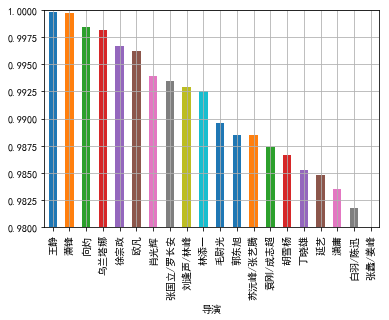

In [13]:
'''
3、分析出不同导演电影的好评率，并筛选出TOP20
'''
data_director = data_t[["导演","好评数","评分人数"]]
data_director_sum = data_director.groupby("导演").sum().drop("缺失数据")
director_praise =(data_director_sum["好评数"]/data_director_sum["评分人数"]).sort_values(ascending= False)[0:20]
director_praise.plot(kind='bar',ylim=[0.98,1],grid=True)

2000年有40条数据
       导演  上映年份     整理后剧名         评分人数          好评数
1909  陈宝国  2000     请你原谅我  1.48345e+08  1.46439e+08
704   刘家成  2000   铁齿铜牙纪晓岚  1.22317e+07  1.08871e+07
713   张国立  2000  康熙微服私访记3  2.50998e+06  2.24604e+06
979    梦继  2000   都是天使惹的祸  2.07875e+06  1.87022e+06
997   徐庆东  2000      重案6组  5.84994e+06  5.29446e+06
1494  张子恩  2000   上错花轿嫁对郎  1.12654e+07  1.04776e+07
-------

2001年有49条数据
           导演  上映年份   整理后剧名         评分人数          好评数
1027       英达  2001   东北1家人  2.67434e+06  2.55023e+06
1338      王冀邢  2001      黑冰  1.70336e+06  1.27859e+06
1863      胡明凯  2001  少年包青天2  4.80992e+06  4.33552e+06
1972  陈家林、刘大印  2001    康熙王朝  4.58946e+06  3.81188e+06
-------

2002年有74条数据
          导演  上映年份       整理后剧名         评分人数          好评数
69       赵宝刚  2002  拿什么拯救你我的爱人  2.18429e+06  1.95477e+06
670      梁德龙  2002       少年张3丰  4.80301e+07   4.2451e+07
179      王文杰  2002         大染坊   1.2139e+06       943441
542      高力强  2002       乌龙闯情关  1.77873e+07  1.62828e+07
560      胡雪杨  2002        白

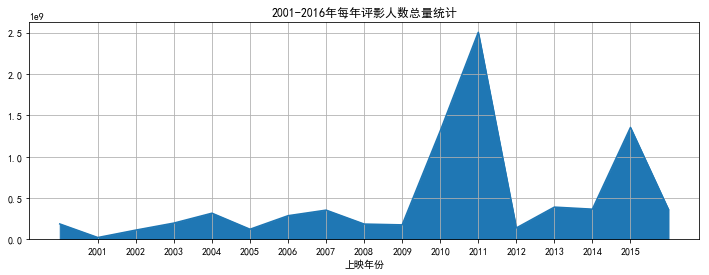

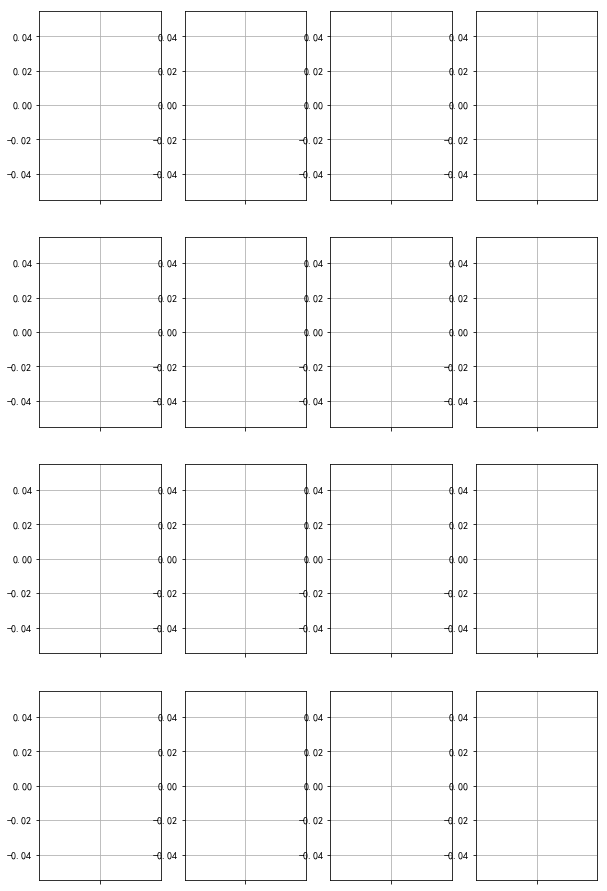

In [14]:
'''
4、统计分析2001-2016年每年评影人数总量
'''
film_date = data_t[["导演","上映年份","整理后剧名"]].drop_duplicates()
film_date = film_date[film_date["上映年份"]!=0]
film_date = film_date[film_date["导演"]!='缺失数据']

comment = data_t[['整理后剧名','评分人数','好评数']].groupby("整理后剧名").sum()

year_comment = pd.merge(film_date,comment,left_on="整理后剧名",right_index=True)
year_comment_data = year_comment[['上映年份','好评数','评分人数']].groupby("上映年份").sum()

#按照上映年份统计评分人数
fig1 = plt.figure(num=1)
year_comment_data['评分人数'][15:-1].plot.area(figsize = (12,4),grid=True)
plt.xticks(range(2001,2016))
plt.title('2001-2016年每年评影人数总量统计')

#绘制箱线图
fig,axes = plt.subplots(4,4,figsize=(10,16))
start = 2001
for i in range(4):
    for j in range(4):
        data = year_comment[year_comment['上映年份'] == start]
        data[['评分人数','好评数']].boxplot(ax = axes[i,j])  # 创建矩阵箱型图
        start += 1

#查看异常值
a = year_comment[year_comment['上映年份'] == 2001]
def data_error(df,col):
    q1 = df[col].quantile(q=0.25)  
    q3 = df[col].quantile(q=0.75)  
    iqr = q3 - q1   # IQR
    tmax = q3 + 3 * iqr  
    tmin = q3 - 3 * iqr  
    return(tmax,tmin)


for i in range(2000,2016):
    datayear = year_comment[year_comment['上映年份'] == i]  # 筛选该年度的数据
    print('%i年有%i条数据' % (i,len(datayear)))  # 查看每年的数据量
    t = data_error(datayear,'评分人数')  # 得到外限最大最小值
    #print(t)
    print(datayear[datayear['评分人数'] > t[0]])  # 查看评分人数大于外限最大值的异常值
    print('-------\n')
# 查看异常值信息